In [1]:
import pandas as pd

In [2]:
from statsmodels.tsa import arima
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.stattools import adfuller

In [3]:
# JD2015 = pd.read_csv('EIA930_BALANCE_2015_Jul_Dec.csv')
# JJ2016 = pd.read_csv('EIA930_BALANCE_2016_Jan_Jun.csv')
# JD2016 = pd.read_csv('EIA930_BALANCE_2016_Jul_Dec.csv')
# JJ2017 = pd.read_csv('EIA930_BALANCE_2017_Jan_Jun.csv')
# JD2017 = pd.read_csv('EIA930_BALANCE_2017_Jul_Dec.csv')
JJ2018 = pd.read_csv('EIA930_BALANCE_2018_Jan_Jun.csv')
JD2018 = pd.read_csv('EIA930_BALANCE_2018_Jul_Dec.csv')
JJ2019 = pd.read_csv('EIA930_BALANCE_2019_Jan_Jun.csv')
JD2019 = pd.read_csv('EIA930_BALANCE_2019_Jul_Dec.csv')
JJ2020 = pd.read_csv('EIA930_BALANCE_2020_Jan_Jun.csv')
JD2020 = pd.read_csv('EIA930_BALANCE_2020_Jul_Dec.csv')
JJ2021 = pd.read_csv('EIA930_BALANCE_2021_Jan_Jun.csv')
JD2021 = pd.read_csv('EIA930_BALANCE_2021_Jul_Dec.csv')
JJ2022 = pd.read_csv('EIA930_BALANCE_2022_Jan_Jun.csv')
JD2022 = pd.read_csv('EIA930_BALANCE_2022_Jul_Dec.csv')

/home/h/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10,11,14,17,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/h/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10,14,15,16,17,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/h/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10,11,14,15,16,17,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/h/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10,11,14,16,17,1

In [4]:
# JD2017.columns == JD2018.columns  # 15 cols pre 2018, 24 after

len(JD2018.columns)

csvlist = [JJ2018, JD2018, JJ2019, JD2019, JJ2020, JD2020, JJ2021, JD2021, JJ2022, JD2022]



In [5]:
total = pd.concat(csvlist)

In [6]:
total.shape

(2774783, 24)

In [7]:
texas = total.loc[total['Region'] == 'TEX']

In [8]:
texas.set_index(pd.to_datetime(texas['UTC Time at End of Hour']), inplace=True)

In [9]:
texas.head()

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Region,Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources
UTC Time at End of Hour,,,,,,,,,,,,,,,,,,,,,
2018-01-01 07:00:00,ERCO,01/01/2018,1,01/01/2018 1:00:00 AM,01/01/2018 7:00:00 AM,"47,834","50,587","50,800",212,212,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 08:00:00,ERCO,01/01/2018,2,01/01/2018 2:00:00 AM,01/01/2018 8:00:00 AM,"48,313","50,650","51,036",385,384,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 09:00:00,ERCO,01/01/2018,3,01/01/2018 3:00:00 AM,01/01/2018 9:00:00 AM,"49,513","50,737","50,887",150,149,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 10:00:00,ERCO,01/01/2018,4,01/01/2018 4:00:00 AM,01/01/2018 10:00:00 AM,"48,663","51,021","51,419",398,397,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 11:00:00,ERCO,01/01/2018,5,01/01/2018 5:00:00 AM,01/01/2018 11:00:00 AM,"50,639","51,727","52,048",321,320,...,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
interNoNull = texas['Total Interchange (MW)'].dropna()
interFloat = interNoNull.str.replace(',', '').astype(float)

In [34]:
# texas.to_csv('./texasPowerGrid.csv')

<AxesSubplot:xlabel='UTC Time at End of Hour'>

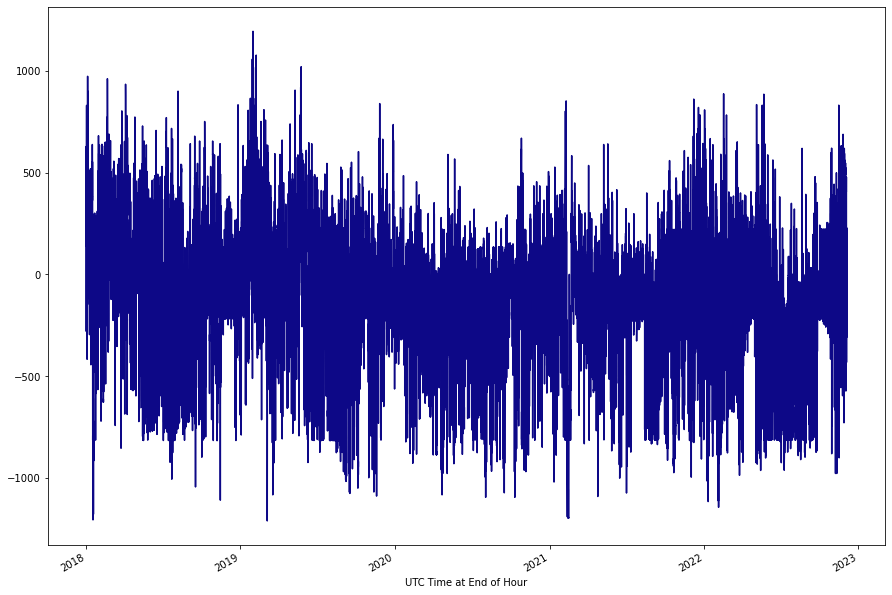

In [72]:
interFloat.plot(figsize=(15,11), colormap='plasma')

<AxesSubplot:xlabel='UTC Time at End of Hour'>

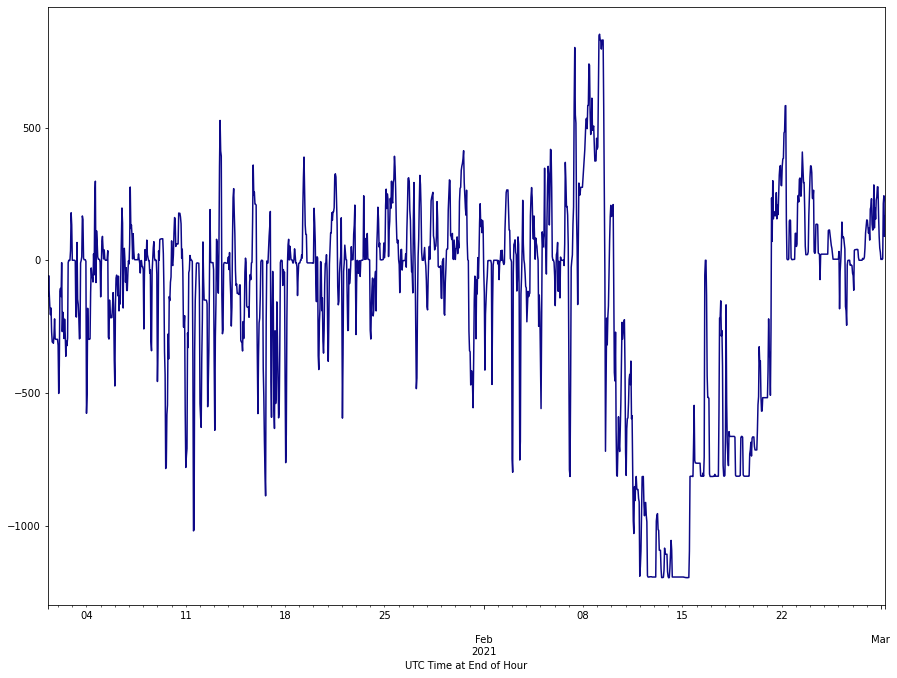

In [79]:
interFloat['2021-01-01 07:00:00':'2021-03-01 07:00:00'].plot(figsize=(15,11), colormap='plasma')

In [11]:
smx = sarimax.SARIMAX(interFloat, order=(1,0,1), seasonal_order=(1,0,1,24)).fit()


/home/h/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/h/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [12]:
smx.forecast(steps=50)

/home/h/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


43075    205.778839
43076    202.783703
43077    190.862208
43078    178.003030
43079    166.523645
43080    139.927567
43081     54.399311
43082      0.346179
43083    110.697931
43084    201.094875
43085    213.029995
43086    228.021688
43087    198.232799
43088    161.619039
43089    152.482928
43090    143.621415
43091     59.228966
43092   -165.316212
43093   -118.434419
43094    -11.055100
43095     32.150999
43096     84.370965
43097     67.517399
43098     37.164186
43099    109.439465
43100    119.904113
43101    119.667761
43102    116.850057
43103    113.965600
43104     95.035037
43105     17.245540
43106    -30.550575
43107     82.197459
43108    174.717960
43109    189.701755
43110    207.209863
43111    180.376378
43112    146.499802
43113    139.285840
43114    132.087633
43115     50.566491
43116   -168.648849
43117   -121.716250
43118    -15.562989
43119     27.511756
43120     79.331204
43121     63.295443
43122     33.942240
43123    105.219486
43124    115.799181
